### MNSIT Handwritten Digit Classification using Deep Learning (Neural Network)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [2]:
import cv2
from PIL import Image
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
# shape of these numpy array
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [5]:
print(x_train[10])
print(x_train[10].shape)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

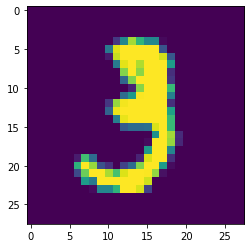

3


In [6]:
# Displaying the image

plt.imshow(x_train[10])
plt.show()

# print the corresponding label
print(y_train[10])

In [7]:
# unique values in y_train
print(np.unique(y_train))

# unique values in y_test
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


### We can use these labels as such or we can also apply One Hot Encoding

In [8]:
# scaling down the data

x_train = x_train/255
x_test = x_test/255

In [9]:
print(x_train[50])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

### Building the Neural Network

In [10]:
# Setting up the layers of Neural Network

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(10, activation='sigmoid')
])

In [11]:
model.compile(optimizer = 'Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
# training the model
model.fit(x_train, y_train, epochs=25)

Epoch 1/25
1875/1875 [==============================] - 13s 4ms/step - loss: 0.3227 - accuracy: 0.9094
Epoch 2/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1622 - accuracy: 0.9526
Epoch 3/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1211 - accuracy: 0.9642
Epoch 4/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0964 - accuracy: 0.9710
Epoch 5/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0804 - accuracy: 0.9760
Epoch 6/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0687 - accuracy: 0.9797
Epoch 7/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0591 - accuracy: 0.9827
Epoch 8/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0520 - accuracy: 0.9835
Epoch 9/25
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0460 - accuracy: 0.9855
Epoch 10/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.04

### Accuracy on test data

In [13]:
loss, accuracy = model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.1294 - accuracy: 0.9737


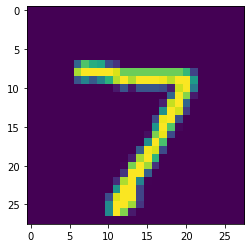

In [14]:
plt.imshow(x_test[0])

In [15]:
print(y_test[0])

7


In [16]:
y_pred = model.predict(x_test)

313/313 [==============================] - 1s 3ms/step


In [17]:
y_pred.shape

(10000, 10)

In [18]:
print(y_pred[0])

[1.5087180e-04 2.2399817e-10 5.9340873e-05 7.5310397e-01 1.2913638e-08
 5.6824519e-04 2.8531656e-12 1.0000000e+00 1.1989932e-03 8.2776117e-01]


In [19]:
label_for_first_image = np.argmax(y_pred[0])
print(label_for_first_image)

7


In [20]:
y_pred_labels = [np.argmax(i) for i in y_pred]

print(y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 8, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 9, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 4, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 8, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

### Now, build confusion matrix

In [21]:
conf_mat = confusion_matrix(y_test, y_pred_labels)

In [22]:
print(conf_mat)

tf.Tensor(
[[ 962    0    0    0    4    3    6    2    2    1]
 [   0 1123    4    0    0    1    2    1    4    0]
 [   3    1  989   11    0    0    6   11   10    1]
 [   0    1    6  981    0    6    1    6    4    5]
 [   0    0    1    2  951    2    7    6    1   12]
 [   1    0    1   11    1  866    4    2    5    1]
 [   5    2    1    2    5    4  936    1    2    0]
 [   1    3    7    1    0    0    0 1009    3    4]
 [   2    1    3    6    5    3    2    5  943    4]
 [   0    2    0    6   11    6    0    6    1  977]], shape=(10, 10), dtype=int32)


Text(0.5, 42.0, 'Predicted Labels')

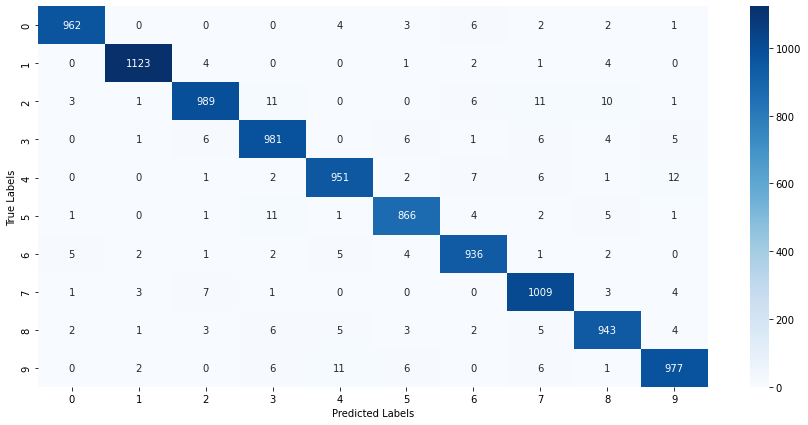

In [23]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

### Building a predictive system

In [34]:
image_file = 'image.png'
input_img = cv2.imread(image_file)

In [35]:
print(input_img)

[[[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 ...

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[19 19 19]
  [19 19 19]
  [51 51 51]
  ...
  [51 51 51]
  [51 51 51]
  [19 19 19]]]


In [36]:
input_img.shape

(452, 451, 3)

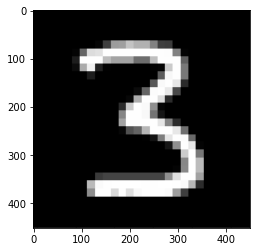

In [38]:
plt.imshow(input_img)

In [39]:
grayscale = cv2.cvtColor(input_img, cv2.COLOR_RGB2GRAY)

In [41]:
grayscale.shape

(452, 451)

In [42]:
resize_img = cv2.resize(grayscale, (28,28))

In [43]:
resize_img.shape

(28, 28)

In [ ]:
plt.imshow(resize_img)

In [50]:
# scale down image
resize_scale = resize_img/255

In [51]:
# reshape the image size
#reshaped_img = np.reshape(resize_scale, (1,28,28))

In [52]:
input_predict = model.predict(reshaped_img)

1/1 [==============================] - 0s 31ms/step


In [53]:
print(input_predict)

[[1.9138623e-24 2.7401920e-06 2.0577183e-03 1.0000000e+00 2.3857667e-18
  5.9485477e-03 2.4203076e-25 2.6382535e-12 3.0374972e-03 1.4684564e-09]]


In [54]:
predict_labels = np.argmax(input_predict)
print(predict_labels)

3


### Build a user input predictive system

In [ ]:
file = input('Path of image you want to predicted:')
input_image = cv2_imread(file)


# Convert colorful img to gray img 1 channel
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

#Now, resize the image 
img_resize = cv2.resize(grayscale, (28,28))

#Scale down the image
image_resize = image_resize/255

# Reshape the image
img_reshape = np.reshape(image_resize, (1,28,28))

prediction_img = model.predict(img_reshape)


prediction_label = np.argmax(prediction_img)

print("The Handwritten Digit is recognized by neural network model is:", prediction_label)